## Step 1: Reading and Understanding the Data

In [111]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [112]:
# import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
# read data
data = pd.read_csv('CarPrice_Assignment.csv')

In [114]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


There are total 26 variables out of which 25 are independent variables and 1 is dependent which is 'Price'

In [115]:
#Check whether data is missing in any of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

None of the data is missing, so now we can infer further 

In [116]:
# check the data types of all features
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

There are a mixture of categorical and numerical variables. Numerical are those of type int and float and categorical those of type object.

In [117]:
# we also have an car_ID variable, that we shoulld not use for predictions:

print('Number of House Id labels: ', len(data.car_ID.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  205
Number of Houses in the Dataset:  205


Id is a unique identifier for each of the houses. Thus this is not a variable that we can use.


In [118]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 10 categorical variables


In [119]:
data.shape

(205, 26)

In [120]:
# as we only need company name, not its model name 
# where CarName feature contain both so lets remove model name from it and only keep company name
data['CarName'] = data.CarName.str.split().str.get(0)

In [121]:
# correcting the spellings 
data['CarName'].replace(
    to_replace=["maxda", "porcshce", "toyouta", "vokswagen"],
    value=["mazda", "porsche", "toyota","volkswagen"],
    inplace=True
)

In [122]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Visualising data

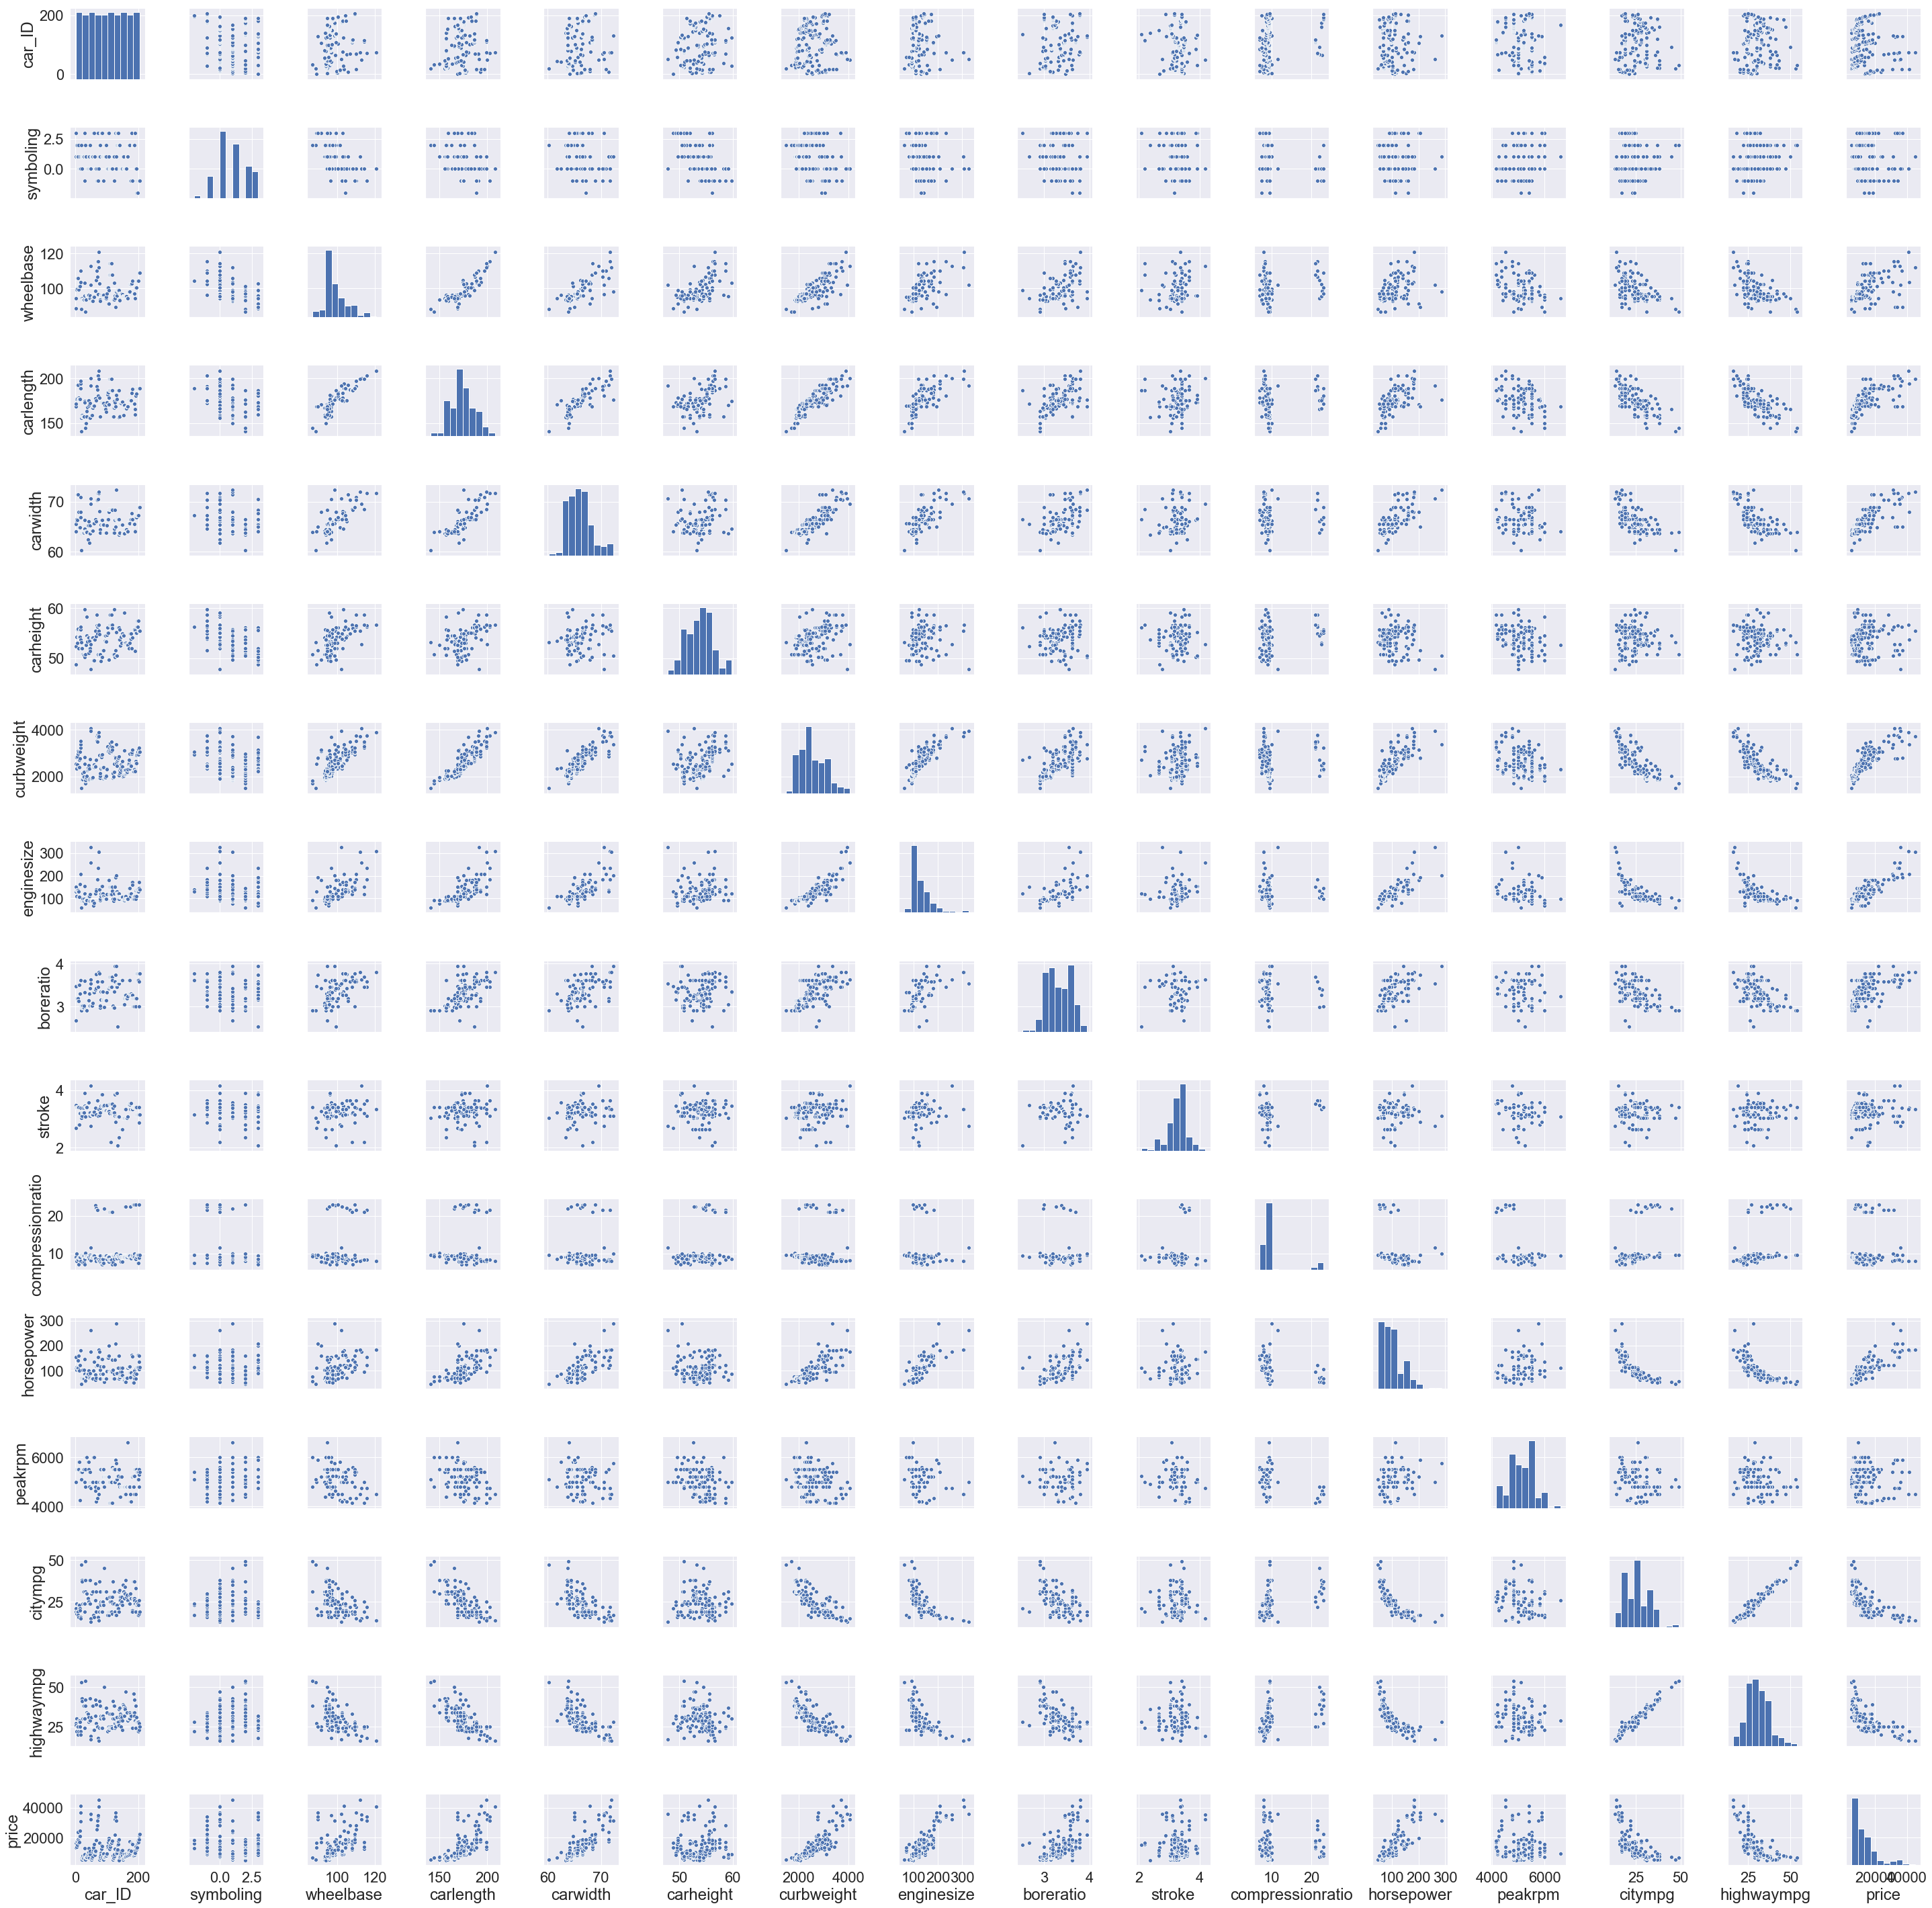

In [123]:
# Let's plot a pair plot of all variables in our dataframe
sns.set(font_scale=2)
sns.pairplot(data)

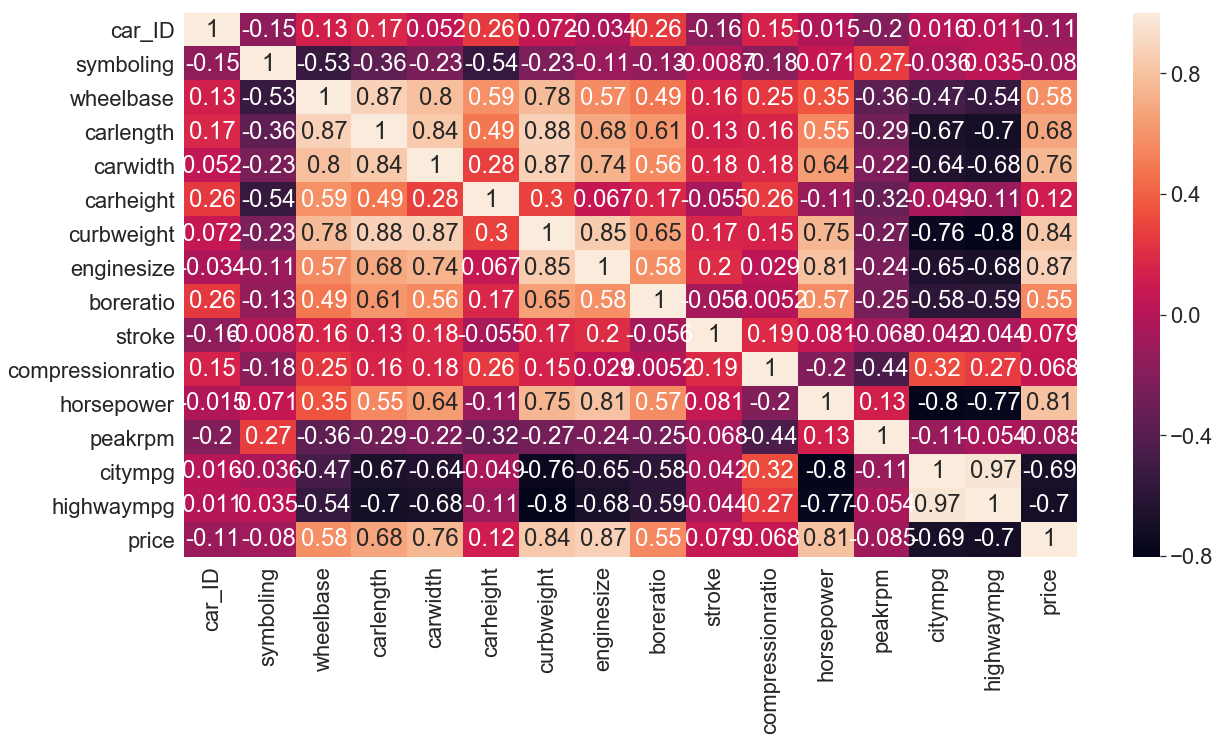

In [124]:
plt.figure(figsize = (20,10))  
sns.heatmap(data.corr(),annot = True)

In [125]:
data.drop(['carwidth','carlength','wheelbase','highwaympg', 'enginesize', 'horsepower', 'citympg'], axis =1, inplace = True)
#remove carID  as its a index
data.drop(['car_ID'], axis =1, inplace = True)

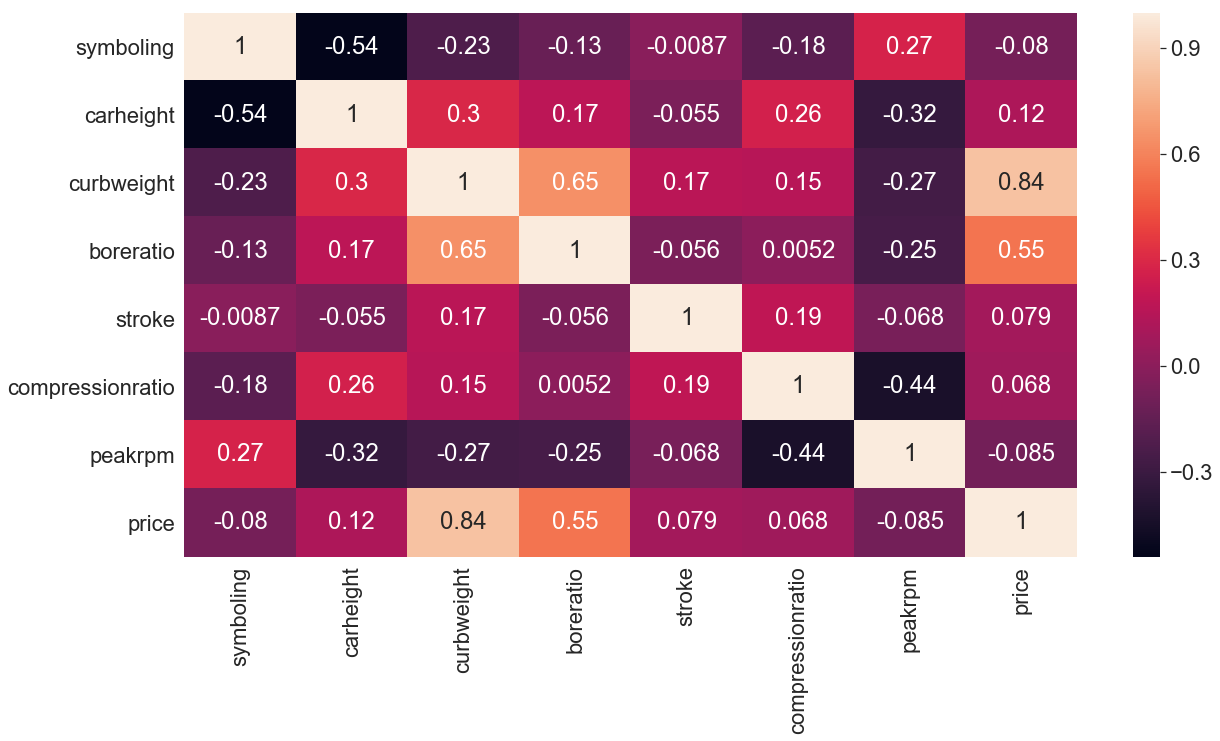

In [126]:
plt.figure(figsize = (20,10))  
sns.heatmap(data.corr(),annot = True)

In [127]:
data.drop(['boreratio'], axis =1, inplace = True)

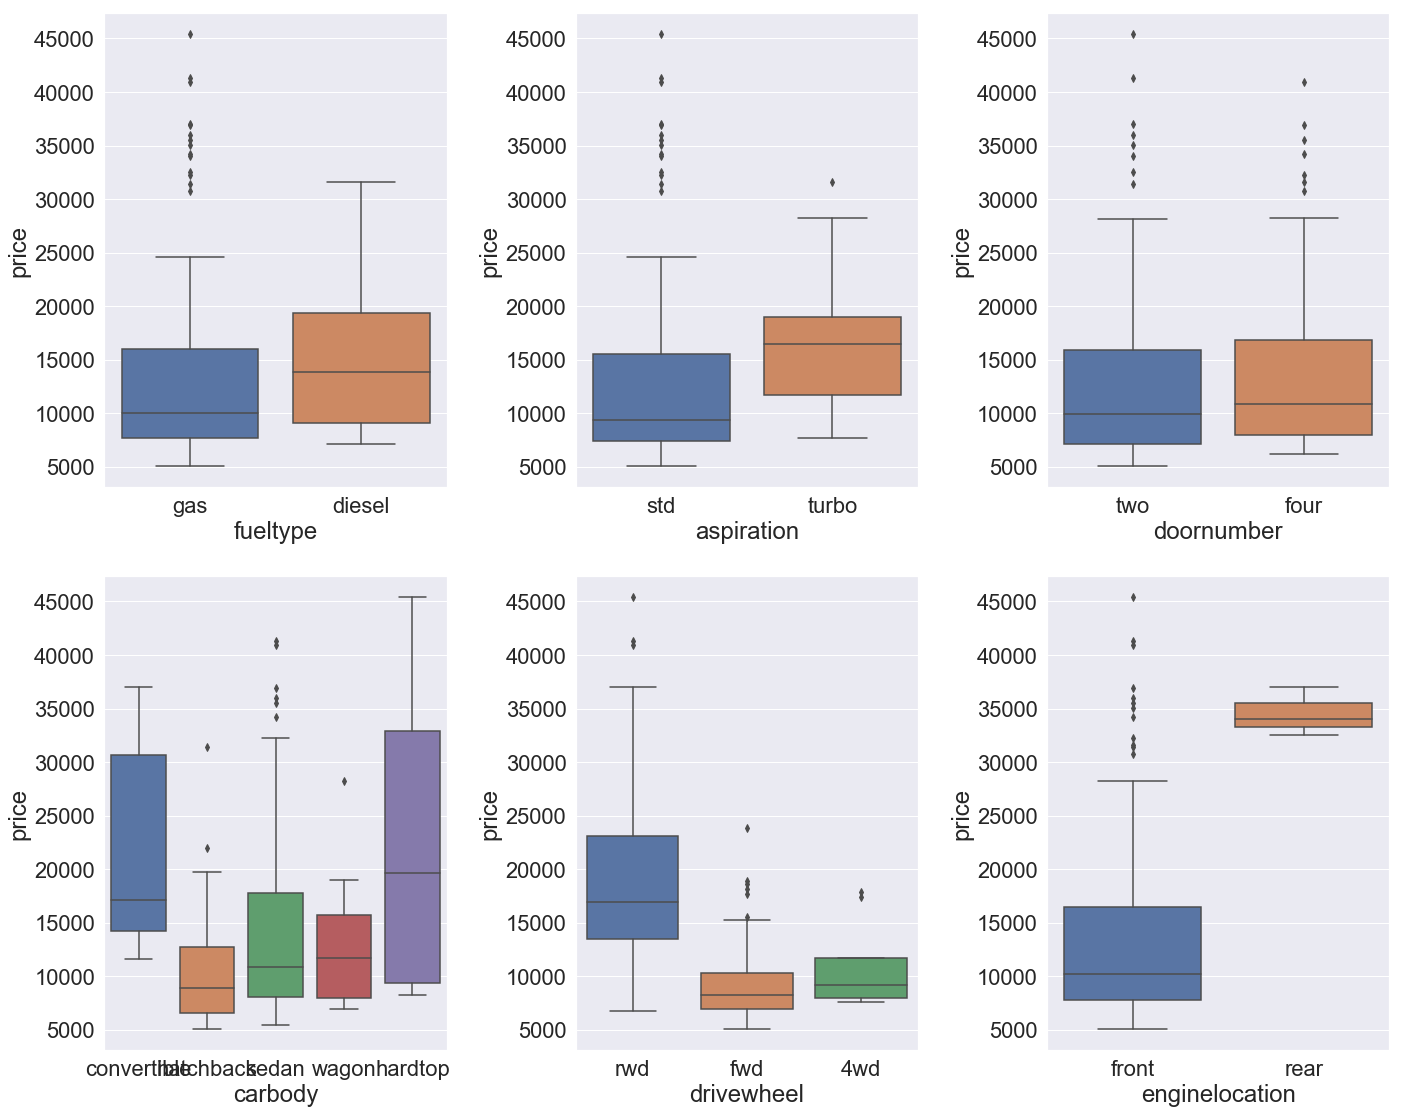

In [128]:
plt.figure(figsize=(20, 16))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)
plt.tight_layout()
plt.show()

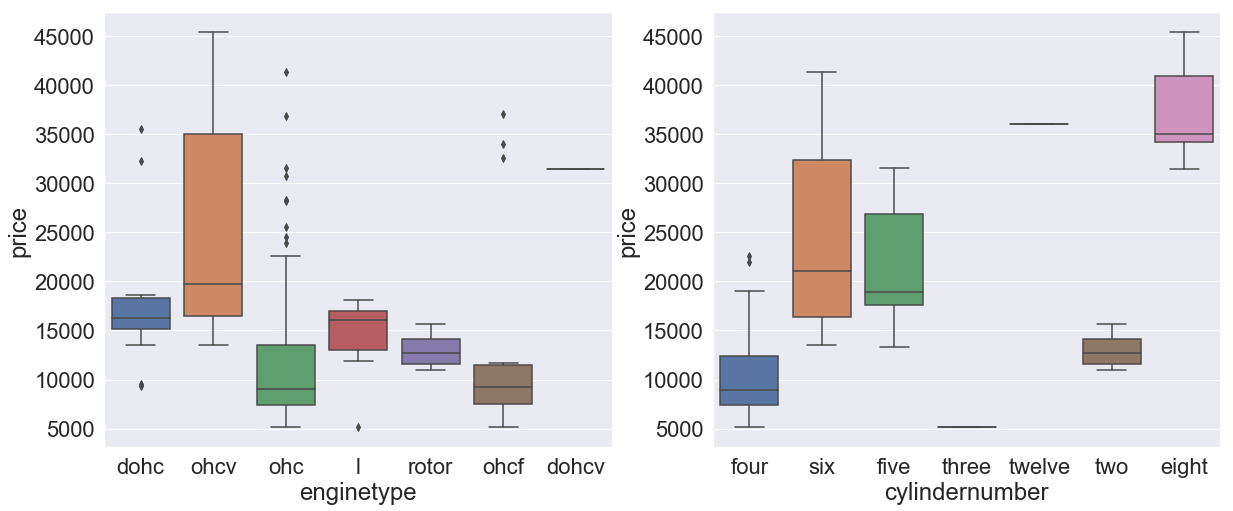

In [129]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(1,2,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)

# Data preparation

we have many categorical features instead of mapping on by one to convert them into numerical variable,
lets use OneHotEncoder and LableEncoder 

In [130]:
data.head(3)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,curbweight,enginetype,cylindernumber,fuelsystem,stroke,compressionratio,peakrpm,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,48.8,2548,dohc,four,mpfi,2.68,9.0,5000,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,48.8,2548,dohc,four,mpfi,2.68,9.0,5000,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,52.4,2823,ohcv,six,mpfi,3.47,9.0,5000,16500.0


In [131]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'fuelsystem', 'stroke',
       'compressionratio', 'peakrpm', 'price'],
      dtype='object')

In [132]:
cat_vars = data.loc[:, ['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']]

In [133]:
cat_vars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [134]:
# let's have a look at how many labels each variable has

for col in cat_vars.columns:
    print(col, ': ', len(cat_vars[col].unique()), ' labels')

symboling :  6  labels
CarName :  24  labels
fueltype :  2  labels
aspiration :  2  labels
doornumber :  2  labels
carbody :  5  labels
drivewheel :  3  labels
enginelocation :  2  labels
enginetype :  7  labels
cylindernumber :  7  labels
fuelsystem :  8  labels


In [135]:
data['fueltype'] = data['fueltype'].map({'gas': 1, 'diesel': 0})
data['aspiration'] = data['aspiration'].map({'std': 1, 'turbo': 0})
data['doornumber'] = data['doornumber'].map({'two': 1, 'four': 0})
data['enginelocation'] = data['enginelocation'].map({'front': 1, 'rear': 0})

In [136]:
symboling = pd.get_dummies(data['symboling'],drop_first=True)
CarName = pd.get_dummies(data['CarName'],drop_first=True)
carbody = pd.get_dummies(data['carbody'],drop_first=True)
drivewheel = pd.get_dummies(data['drivewheel'],drop_first=True)
enginetype = pd.get_dummies(data['enginetype'],drop_first=True)
cylindernumber = pd.get_dummies(data['cylindernumber'],drop_first=True)
fuelsystem = pd.get_dummies(data['fuelsystem'],drop_first=True)

In [137]:
#Adding the results to the master dataframe
data = pd.concat([data,symboling,CarName,carbody,drivewheel,enginetype,cylindernumber,fuelsystem],axis=1)

In [138]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,curbweight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,alfa-romero,1,1,1,convertible,rwd,1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero,1,1,1,convertible,rwd,1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero,1,1,1,hatchback,rwd,1,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,audi,1,1,0,sedan,fwd,1,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,audi,1,1,0,sedan,4wd,1,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [139]:
data.drop(['symboling'],axis=1,inplace=True)
data.drop(['CarName'],axis=1,inplace=True)
data.drop(['carbody'],axis=1,inplace=True)
data.drop(['drivewheel'],axis=1,inplace=True)
data.drop(['enginetype'],axis=1,inplace=True)
data.drop(['cylindernumber'],axis=1,inplace=True)
data.drop(['fuelsystem'],axis=1,inplace=True)

In [140]:
data.head()

,fueltype,aspiration,doornumber,enginelocation,carheight,curbweight,stroke,compressionratio,peakrpm,price,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,1,1,1,48.8,2548,2.68,9.0,5000,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,48.8,2548,2.68,9.0,5000,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,52.4,2823,3.47,9.0,5000,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,54.3,2337,3.40,10.0,5500,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,54.3,2824,3.40,8.0,5500,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [141]:
#defining a normalisation function 
def normalize(x): 
    return ((x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
data = data.apply(normalize) 

In [142]:
data.head()

,fueltype,aspiration,doornumber,enginelocation,carheight,curbweight,stroke,compressionratio,peakrpm,price,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1.0,1.0,1.0,1.0,0.083333,0.411171,0.290476,0.1250,0.346939,0.207959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.083333,0.411171,0.290476,0.1250,0.346939,0.282558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.383333,0.517843,0.666667,0.1250,0.346939,0.282558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.541667,0.329325,0.633333,0.1875,0.551020,0.219254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.541667,0.518231,0.633333,0.0625,0.551020,0.306142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [143]:
data.columns

Index([        'fueltype',       'aspiration',       'doornumber',
         'enginelocation',        'carheight',       'curbweight',
                 'stroke', 'compressionratio',          'peakrpm',
                  'price',                 -1,                  0,
                        1,                  2,                  3,
            'alfa-romero',             'audi',              'bmw',
                  'buick',        'chevrolet',            'dodge',
                  'honda',            'isuzu',           'jaguar',
                  'mazda',          'mercury',       'mitsubishi',
                 'nissan',          'peugeot',         'plymouth',
                'porsche',          'renault',             'saab',
                 'subaru',           'toyota',       'volkswagen',
                  'volvo',               'vw',          'hardtop',
              'hatchback',            'sedan',            'wagon',
                    'fwd',              'rwd',            'doh

In [144]:
X = data.drop(['price'],axis=1)
y = data['price']

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [146]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [147]:
y_pred = mlr.predict(X_test)

In [148]:
from sklearn.feature_selection import RFE
rfe = RFE(mlr, 12)

In [149]:
rfe = rfe.fit(X_train, y_train)

In [150]:
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False  True False False False False False False
 False False  True  True  True  True False False False False  True False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False  True  True  True False False  True False False False False False
 False False]
[11 17 32  1 46  1 40 12  4 25 27 28 26 29  1  1  1  1 35 16 42  5  1 36
 50 14 38 33 15  1 49 45 22 31 39 47 41 21 23 24 10  7  6 48 30  9  8  3
  2  1  1  1 51 37  1 19 43 13 34 20 44 18]


In [151]:
X_train = X_train.iloc[:, [3, 5, 14, 15, 16, 17, 22, 29, 49, 50, 51, 54]]

In [152]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
mlr_1 = sm.OLS(y_train,X_train).fit()

In [153]:
#Let's see the summary of our first linear model
print(mlr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     162.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.21e-70
Time:                        17:00:53   Log-Likelihood:                 221.86
No. Observations:                 143   AIC:                            -419.7
Df Residuals:                     131   BIC:                            -384.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2331      0.034      6.

In [154]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [155]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginelocation,inf
8,porsche,inf
10,four,18.29
11,six,11.61
9,five,3.73
6,buick,3.69
12,two,3.18
2,curbweight,2.10
4,audi,1.61
7,jaguar,1.55


In [156]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('enginelocation', 1)

In [157]:
# Create a fourth fitted model
mlr_2 = sm.OLS(y_train,X_train).fit()

In [158]:
print(mlr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     162.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.21e-70
Time:                        17:01:40   Log-Likelihood:                 221.86
No. Observations:                 143   AIC:                            -419.7
Df Residuals:                     131   BIC:                            -384.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1059      0.049      2.145      

In [159]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,121.44
9,four,18.29
10,six,11.61
8,five,3.73
5,buick,3.69
11,two,3.18
1,curbweight,2.10
3,audi,1.61
6,jaguar,1.55
7,porsche,1.28


In [160]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['four'], 1)

In [161]:
# Create a fourth fitted model
mlr_3 = sm.OLS(y_train,X_train).fit()

In [162]:
print(mlr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     161.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.79e-69
Time:                        17:02:37   Log-Likelihood:                 214.79
No. Observations:                 143   AIC:                            -407.6
Df Residuals:                     132   BIC:                            -375.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0703      0.013     -5.421      

In [163]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.65
5,buick,2.25
8,five,2.23
1,curbweight,2.05
9,six,1.89
3,audi,1.44
6,jaguar,1.32
7,porsche,1.27
4,bmw,1.21
2,alfa-romero,1.02


In [164]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('six', 1)

In [165]:
# Create a fourth fitted model
mlr_4 = sm.OLS(y_train,X_train).fit()
print(mlr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     176.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.70e-69
Time:                        17:03:17   Log-Likelihood:                 213.28
No. Observations:                 143   AIC:                            -406.6
Df Residuals:                     133   BIC:                            -376.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0769      0.012     -6.165      

In [166]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.97
8,five,2.23
5,buick,2.16
1,curbweight,1.69
3,audi,1.43
6,jaguar,1.31
4,bmw,1.05
7,porsche,1.02
2,alfa-romero,1.01
9,two,1.00


# Making prediction using final model

In [175]:
a = X_test.drop(['fueltype',     'aspiration',       'doornumber',
         'enginelocation',        'carheight',       
                 'stroke', 'compressionratio',          'peakrpm',
                       -1,                  0,                  1,
                        2,                  3,      
                               
              'chevrolet',            'dodge',            'honda',
                  'isuzu',            'mazda',
                'mercury',       'mitsubishi',           'nissan',
                'peugeot',         'plymouth',         
                'renault',             'saab',           'subaru',
                 'toyota',       'volkswagen',            'volvo',
                     'vw',          'hardtop',        'hatchback',
                  'sedan',            'wagon',              'fwd',
                    'rwd',            'dohcv',                'l',
                    'ohc',             'ohcf',             'ohcv',
                  'rotor',             'four',
                    'six',            'three',           'twelve',
                   '2bbl',             '4bbl',
                    'idi',              'mfi',             'mpfi',
                   'spdi',             'spfi'], axis=1)

In [176]:
a.head()

,curbweight,alfa-romero,audi,bmw,buick,jaguar,porsche,five,two
52,0.161753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181,0.645074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.395268,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,0.314973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
a = sm.add_constant(a)

In [178]:
a.head()

,const,curbweight,alfa-romero,audi,bmw,buick,jaguar,porsche,five,two
52,1.0,0.161753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181,1.0,0.645074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.395268,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,1.0,0.314973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
# Making predictions
y_predict_final = mlr_4.predict(a)

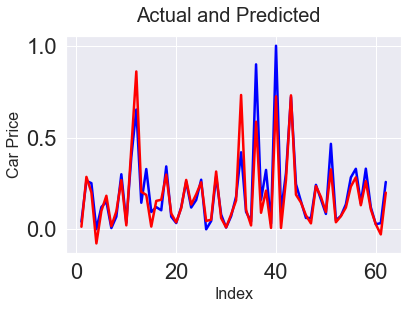

In [180]:
# Actual vs Predicted
c = [i for i in range(1,63)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_predict_final, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Car Price', fontsize=16);

Text(0, 0.5, 'y_pred')

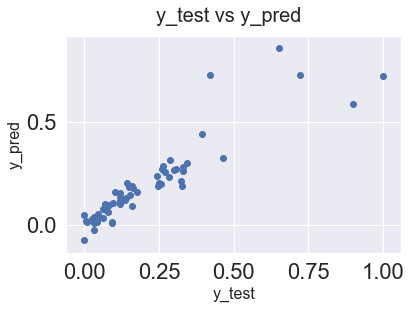

In [181]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_predict_final)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'ytest-ypred')

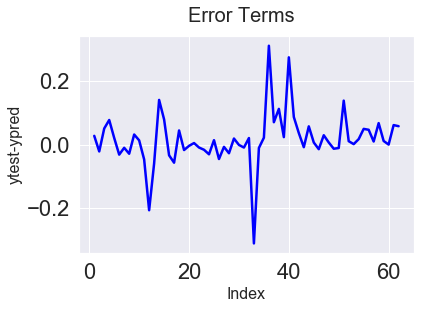

In [183]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_predict_final, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'Index')

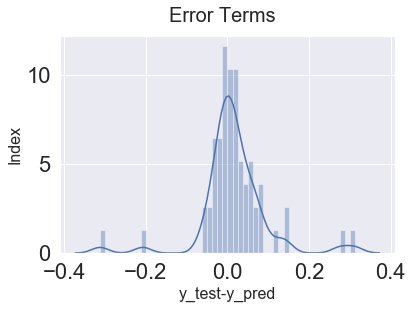

In [184]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_predict_final),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=16)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [185]:
from sklearn.metrics import r2_score
r2_square = r2_score(y_test, y_predict_final)

In [186]:
r2_square

0.8255388126013852